In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import init_printing
init_printing()
%matplotlib

Using matplotlib backend: MacOSX


# Invariant signatures
Rewrite using symbolic differentiation to eliminate numerical artefacts. 

Need to compose spatial transformation with evaluation of signature

## Spatial transformations
Each spatial transformation is represented by a class (which may be made into a subclass of some base class at a later date). They just need to implement the forward and reverse transformations of the function.

In [2]:
from sympy import sin, cos, Matrix, exp
class SE2Transform:
    def __init__(self, theta, tx, ty):
        self.Q = Matrix([[cos(theta), sin(theta)],
                        [-sin(theta), cos(theta)]])
        self.Qt = self.Q.transpose()
        self.t = Matrix([[tx], [ty]]) 
    
    def forward(self, x):
        return self.Q*x + self.t
    
    def reverse(self, y):
        return self.Qt*(y - self.t)

In [3]:
def SE2_signature(F):
    """ Compute equiaffine-invariant image signature using finite differences"""
    Fx = diff(F, x)
    Fy = diff(F, y)
    Fxx = diff(Fx, x)
    Fxy = diff(Fx, y)
    Fyy = diff(Fy, y)
    
    I0 = F # function value
    I1 = Fx*Fx + Fy*Fy
    I2 = Fxx + Fyy
    return (I0, I1, I2)

In [4]:
from sympy.abc import x, y
from sympy import lambdify, diff, expand, factor

tf = SE2Transform(1, 0.1, -0.2)
x0 = Matrix([[x], [y]])

x_new = tf.reverse(x0)

f = lambda x, y: exp(-4*x**2 - 8*(y - 0.2*x - 0.8*x**2)**2)
f_old = f(x, y)
f_new = f(x_new[0], x_new[1])

f_numeric = lambdify((x, y), f_old, "numpy")
f_new_numeric = lambdify((x, y), f_new, "numpy")

In [5]:
x_g = np.linspace(-1, 1, 200)
y_g = np.linspace(-1, 1, 200)
X, Y = np.meshgrid(x_g, y_g)

plt.imshow(f_numeric(X, Y))

In [6]:
foo = lambdify((x, y), SE2_signature(f_new), "numpy")
foo2 = lambdify((x, y), SE2_signature(f_old), "numpy")
sig = foo(X, Y)
sig2= foo2(X, Y)
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(sig[1], sig[2], sig[0])
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(sig2[1], sig2[2], sig2[0], color='red')


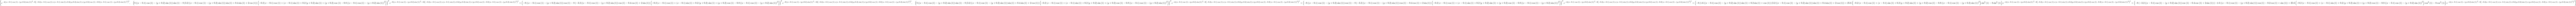

In [8]:
SE2_signature(f_new)